##### pip install missingno

# 1 - Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
import sklearn
warnings.filterwarnings("ignore")

import missingno as ms


plt.style.use("ggplot")

df=pd.read_excel('Volve_production_data.xlsx',sheet_name='Daily Production Data')
df.head().transpose()

0                    1  \
DATEPRD                   2014-04-07 00:00:00  2014-04-08 00:00:00   
WELL_BORE_CODE                  NO 15/9-F-1 C        NO 15/9-F-1 C   
NPD_WELL_BORE_CODE                       7405                 7405   
NPD_WELL_BORE_NAME                 15/9-F-1 C           15/9-F-1 C   
NPD_FIELD_CODE                        3420717              3420717   
NPD_FIELD_NAME                          VOLVE                VOLVE   
NPD_FACILITY_CODE                      369304               369304   
NPD_FACILITY_NAME              MÆRSK INSPIRER       MÆRSK INSPIRER   
ON_STREAM_HRS                             0.0                  0.0   
AVG_DOWNHOLE_PRESSURE                     0.0                  NaN   
AVG_DOWNHOLE_TEMPERATURE                  0.0                  NaN   
AVG_DP_TUBING                             0.0                  NaN   
AVG_ANNULUS_PRESS                         0.0                  0.0   
AVG_CHOKE_SIZE_P                          0.0             1.003059   
AVG_CHOKE_UOM                               %                    %   
AVG_WHP_P                                 0.0                  0.0   
AVG_WHT_P                                 0.0                  0.0   
DP_CHOKE_SIZE                             0.0                  0.0   
BORE_OIL_VOL                              0.0                  0.0   
BORE_GAS_VOL                              0.0                  0.0   
BORE_WAT_VOL                              0.0                  0.0   
BORE_WI_VOL                               NaN                  NaN   
FLOW_KIND                          production           production   
WELL_TYPE                                  WI                   OP   

                                            2                    3  \
DATEPRD                   2014-04-09 00:00:00  2014-04-10 00:00:00   
WELL_BORE_CODE                  NO 15/9-F-1 C        NO 15/9-F-1 C   
NPD_WELL_BORE_CODE                       7405                 7405   
NPD_WELL_BORE_NAME                 15/9-F-1 C           15/9-F-1 C   
NPD_FIELD_CODE                        3420717              3420717   
NPD_FIELD_NAME                          VOLVE                VOLVE   
NPD_FACILITY_CODE                      369304               369304   
NPD_FACILITY_NAME              MÆRSK INSPIRER       MÆRSK INSPIRER   
ON_STREAM_HRS                             0.0                  0.0   
AVG_DOWNHOLE_PRESSURE                     NaN                  NaN   
AVG_DOWNHOLE_TEMPERATURE                  NaN                  NaN   
AVG_DP_TUBING                             NaN                  NaN   
AVG_ANNULUS_PRESS                         0.0                  0.0   
AVG_CHOKE_SIZE_P                     0.979008             0.545759   
AVG_CHOKE_UOM                               %                    %   
AVG_WHP_P                                 0.0                  0.0   
AVG_WHT_P                                 0.0                  0.0   
DP_CHOKE_SIZE                             0.0                  0.0   
BORE_OIL_VOL                              0.0                  0.0   
BORE_GAS_VOL                              0.0                  0.0   
BORE_WAT_VOL                              0.0                  0.0   
BORE_WI_VOL                               NaN                  NaN   
FLOW_KIND                          production           production   
WELL_TYPE                                  OP                   OP   

                                            4  
DATEPRD                   2014-04-11 00:00:00  
WELL_BORE_CODE                  NO 15/9-F-1 C  
NPD_WELL_BORE_CODE                       7405  
NPD_WELL_BORE_NAME                 15/9-F-1 C  
NPD_FIELD_CODE                        3420717  
NPD_FIELD_NAME                          VOLVE  
NPD_FACILITY_CODE                      369304  
NPD_FACILITY_NAME              MÆRSK INSPIRER  
ON_STREAM_HRS                             0.0  
AVG_DOWNHOLE_PRESSURE               310.37614  
AVG_DOWNHOLE_T

# 2 - EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [3]:
df.isna().any(axis=0)

DATEPRD                     False
WELL_BORE_CODE              False
NPD_WELL_BORE_CODE          False
NPD_WELL_BORE_NAME          False
NPD_FIELD_CODE              False
NPD_FIELD_NAME              False
NPD_FACILITY_CODE           False
NPD_FACILITY_NAME           False
ON_STREAM_HRS                True
AVG_DOWNHOLE_PRESSURE        True
AVG_DOWNHOLE_TEMPERATURE     True
AVG_DP_TUBING                True
AVG_ANNULUS_PRESS            True
AVG_CHOKE_SIZE_P             True
AVG_CHOKE_UOM                True
AVG_WHP_P                    True
AVG_WHT_P                    True
DP_CHOKE_SIZE                True
BORE_OIL_VOL                 True
BORE_GAS_VOL                 True
BORE_WAT_VOL                 True
BORE_WI_VOL                  True
FLOW_KIND                   False
WELL_TYPE                   False
dtype: bool

In [4]:
df["WELL_TYPE"].unique()          # Select WI is Water injection and OP is oil production

array(['WI', 'OP'], dtype=object)

In [5]:
dfoil = df[df["WELL_TYPE"]== "OP"]         # Select only oil production rows
dfoil.shape

(9143, 24)

In [6]:
df.shape

(15634, 24)

In [7]:
dfoil["WELL_BORE_CODE"].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-5 AH'], dtype=object)

In [8]:
df1 = dfoil[dfoil["WELL_BORE_CODE"] == 'NO 15/9-F-1 C']
df2 = dfoil[dfoil["WELL_BORE_CODE"] == 'NO 15/9-F-11 H']
df3 = dfoil[dfoil["WELL_BORE_CODE"] == 'NO 15/9-F-12 H']
df4 = dfoil[dfoil["WELL_BORE_CODE"] == 'NO 15/9-F-14 H']
df5 = dfoil[dfoil["WELL_BORE_CODE"] == 'NO 15/9-F-15 D']
df6 = dfoil[dfoil["WELL_BORE_CODE"] == 'NO 15/9-F-4 AH']
df7 = dfoil[dfoil["WELL_BORE_CODE"] == 'NO 15/9-F-5 AH']


print(df1.shape, df2.shape, df3.shape,df4.shape,df5.shape,df6.shape,df7.shape)

(744, 24) (1165, 24) (3056, 24) (3056, 24) (978, 24) (0, 24) (144, 24)


In [9]:
df6 = df[df["WELL_BORE_CODE"] == 'NO 15/9-F-4 AH']        # Well NO 15/9-F-4 AH is used only for water injection 
df6.head()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
9001 2007-09-01  NO 15/9-F-4 AH                5693           15/9-F-4   
9002 2007-09-02  NO 15/9-F-4 AH                5693           15/9-F-4   
9003 2007-09-03  NO 15/9-F-4 AH                5693           15/9-F-4   
9004 2007-09-04  NO 15/9-F-4 AH                5693           15/9-F-4   
9005 2007-09-05  NO 15/9-F-4 AH                5693           15/9-F-4   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
9001         3420717          VOLVE             369304    MÆRSK INSPIRER   
9002         3420717          VOLVE             369304    MÆRSK INSPIRER   
9003         3420717          VOLVE             369304    MÆRSK INSPIRER   
9004         3420717          VOLVE             369304    MÆRSK INSPIRER   
9005         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
9001            NaN                    NaN  ...            NaN        NaN   
9002            NaN                    NaN  ...            NaN        NaN   
9003            NaN                    NaN  ...            NaN        NaN   
9004            NaN                    NaN  ...            NaN        NaN   
9005            NaN                    NaN  ...            NaN        NaN   

      AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
9001        NaN            NaN          NaN           NaN           NaN   
9002        NaN            NaN          NaN           NaN           NaN   
9003        NaN            NaN          NaN           NaN           NaN   
9004        NaN            NaN          NaN           NaN           NaN   
9005        NaN            NaN          NaN           NaN           NaN   

      BORE_WI_VOL  FLOW_KIND  WELL_TYPE  
9001          NaN  injection         WI  
9002          NaN  injection         WI  
9003          NaN  injection         WI  
9004          NaN  injection         WI  
9005          NaN  injection         WI  

[5 rows x 24 columns]

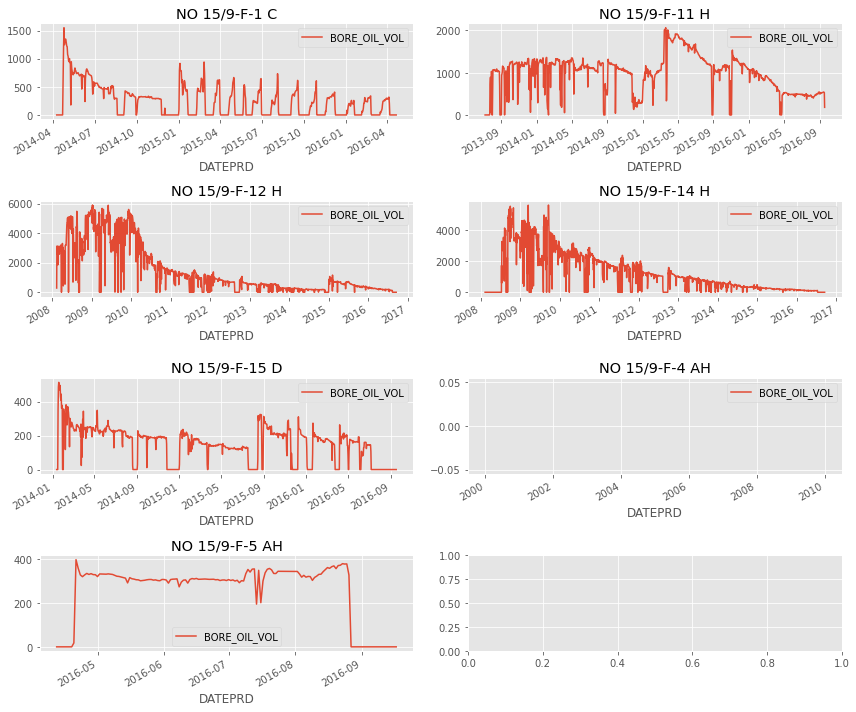

In [10]:
f, axes = plt.subplots(4, 2, figsize=(12, 10))

df1.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "NO 15/9-F-1 C", fontsize = 10, ax=axes[0, 0]) 
df2.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "NO 15/9-F-11 H", fontsize = 10, ax=axes[0, 1])
df3.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "NO 15/9-F-12 H", fontsize = 10, ax=axes[1, 0]) 
df4.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "NO 15/9-F-14 H", fontsize = 10, ax=axes[1, 1]) 
df5.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "NO 15/9-F-15 D", fontsize = 10, ax=axes[2, 0]) 
df6.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "NO 15/9-F-4 AH", fontsize = 10, ax=axes[2, 1]) 
df7.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "NO 15/9-F-5 AH", fontsize = 10, ax=axes[3, 0]) 

plt.tight_layout() 

## df6 has no Oil Production !!!

## df1, df2, df5 & df7 have less number of data ( few years)

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 3))

ms.bar(df3, fontsize = 11, ax=axes[0])                              # plotting to see missing values in dfs
axes[0].set_title("NO 15/9-F-12 H, >>>>>>>  df3")

ms.bar(df4, fontsize = 11, ax=axes[1])
axes[1].set_title("NO 15/9-F-14 H, >>>>>>>  df4")

Text(0.5, 1.0, 'NO 15/9-F-14 H, >>>>>>>  df4')

## Have chosen Well NO 15/9-F-12 H, >>>>>>>  df3,   based on EDA 

In [12]:
df3.describe().transpose()

count          mean            std         min  \
NPD_WELL_BORE_CODE        3056.0  5.599000e+03       0.000000     5599.00   
NPD_FIELD_CODE            3056.0  3.420717e+06       0.000000  3420717.00   
NPD_FACILITY_CODE         3056.0  3.693040e+05       0.000000   369304.00   
ON_STREAM_HRS             3056.0  2.133641e+01       6.889150        0.00   
AVG_DOWNHOLE_PRESSURE     3050.0  8.072907e+01     120.086902        0.00   
AVG_DOWNHOLE_TEMPERATURE  3050.0  3.329208e+01      49.354533        0.00   
AVG_DP_TUBING             3050.0  8.476592e+01      72.511534        0.00   
AVG_ANNULUS_PRESS         3043.0  1.727220e+01       6.396437        0.00   
AVG_CHOKE_SIZE_P          3012.0  6.925435e+01      30.179952        0.00   
AVG_WHP_P                 3056.0  4.797301e+01      24.305518        0.00   
AVG_WHT_P                 3056.0  7.862393e+01      20.275990        0.00   
DP_CHOKE_SIZE             3056.0  1.929267e+01      22.750867        0.00   
BORE_OIL_VOL              3056.0  1.498563e+03    1662.851799        0.00   
BORE_GAS_VOL              3056.0  2.184366e+05  235250.885353        0.00   
BORE_WAT_VOL              3056.0  2.236034e+03    1952.408547     -457.84   
BORE_WI_VOL                  0.0           NaN            NaN         NaN   

                                   25%           50%           75%  \
NPD_WELL_BORE_CODE        5.599000e+03  5.599000e+03  5.599000e+03   
NPD_FIELD_CODE            3.420717e+06  3.420717e+06  3.420717e+06   
NPD_FACILITY_CODE         3.693040e+05  3.693040e+05  3.693040e+05   
ON_STREAM_HRS             2.400000e+01  2.400000e+01  2.400000e+01   
AVG_DOWNHOLE_PRESSURE     0.000000e+00  0.000000e+00  2.394228e+02   
AVG_DOWNHOLE_TEMPERATURE  0.000000e+00  0.000000e+00  1.060482e+02   
AVG_DP_TUBING             3.245482e+01  3.872129e+01  1.711901e+02   
AVG_ANNULUS_PRESS         1.397576e+01  1.866002e+01  2.082552e+01   
AVG_CHOKE_SIZE_P          4.889411e+01  7.072459e+01  9.999813e+01   
AVG_WHP_P                 3.242184e+01  3.844574e+01  5.959807e+01   
AVG_WHT_P                 7.842029e+01  8.292471e+01  9.015999e+01   
DP_CHOKE_SIZE             3.966373e+00  7.502564e+00  2.742852e+01   
BORE_OIL_VOL              2.662225e+02  6.976550e+02  2.404468e+03   
BORE_GAS_VOL              4.100499e+04  1.077343e+05  3.448205e+05   
BORE_WAT_VOL              1.568725e+02  1.349840e+03  4.397453e+03   
BORE_WI_VOL                        NaN           NaN           NaN   

                                   max  
NPD_WELL_BORE_CODE        5.599000e+03  
NPD_FIELD_CODE            3.420717e+06  
NPD_FACILITY_CODE         3.693040e+05  
ON_STREAM_HRS             2.500000e+01  
AVG_DOWNHOLE_PRESSURE     3.177011e+02  
AVG_DOWNHOLE_TEMPERATURE  1.075076e+02  
AVG_DP_TUBING             3.144092e+02  
AVG_ANNULUS_PRESS         3.001983e+01  
AVG_CHOKE_SIZE_P          1.000000e+02  
AVG_WHP_P                 1.373110e+02  
AVG_WHT_P                 9.245864e+01  
DP_CHOKE_SIZE             1.241230e+02  
BORE_OIL_VOL              5.901840e+03  
BORE_GAS_VOL              8.511315e+05  
BORE_WAT_VOL              8.019740e+03  
BORE_WI_VOL                        NaN

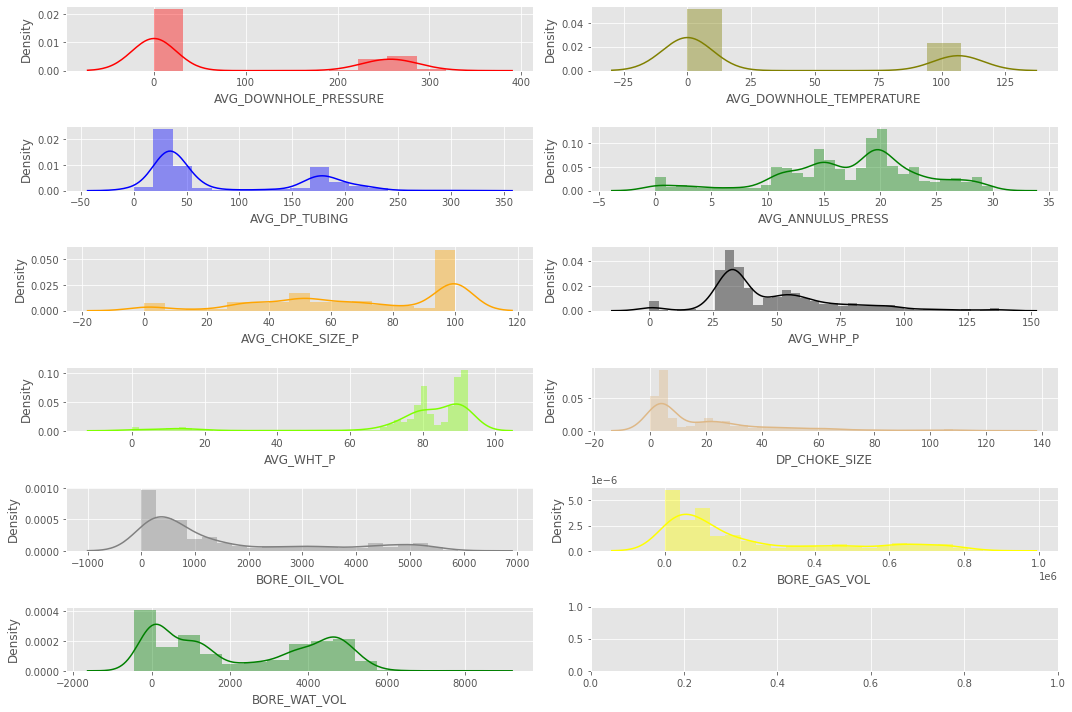

In [13]:
f, axes = plt.subplots(6, 2, figsize=(15, 10))

sns.distplot(df3['AVG_DOWNHOLE_PRESSURE'] , color="red", ax=axes[0, 0])
sns.distplot(df3['AVG_DOWNHOLE_TEMPERATURE'] , color="olive", ax=axes[0, 1])
sns.distplot(df3['AVG_DP_TUBING'] , color="blue", ax=axes[1, 0])
sns.distplot(df3['AVG_ANNULUS_PRESS'] , color="green", ax=axes[1, 1])
sns.distplot(df3['AVG_CHOKE_SIZE_P'] , color="orange", ax=axes[2, 0])
sns.distplot(df3['AVG_WHP_P'] , color="black", ax=axes[2, 1])
sns.distplot(df3['AVG_WHT_P'] , color="chartreuse", ax=axes[3, 0])
sns.distplot(df3['DP_CHOKE_SIZE'] , color="burlywood", ax=axes[3, 1])
sns.distplot(df3['BORE_OIL_VOL'] , color="gray", ax=axes[4, 0])
sns.distplot(df3['BORE_GAS_VOL'] , color="yellow", ax=axes[4, 1])
sns.distplot(df3['BORE_WAT_VOL'] , color="green", ax=axes[5, 0])


plt.tight_layout()

In [14]:
f, axes = plt.subplots(6, 2, figsize=(15, 10))

sns.boxplot(df3['AVG_DOWNHOLE_PRESSURE'] , color="red", ax=axes[0, 0])
sns.boxplot(df3['AVG_DOWNHOLE_TEMPERATURE'] , color="olive", ax=axes[0, 1])
sns.boxplot(df3['AVG_DP_TUBING'] , color="blue", ax=axes[1, 0])
sns.boxplot(df3['AVG_ANNULUS_PRESS'] , color="green", ax=axes[1, 1])
sns.boxplot(df3['AVG_CHOKE_SIZE_P'] , color="orange", ax=axes[2, 0])
sns.boxplot(df3['AVG_WHP_P'] , color="black", ax=axes[2, 1])
sns.boxplot(df3['AVG_WHT_P'] , color="chartreuse", ax=axes[3, 0])
sns.boxplot(df3['DP_CHOKE_SIZE'] , color="burlywood", ax=axes[3, 1])
sns.boxplot(df3['BORE_OIL_VOL'] , color="gray", ax=axes[4, 0])
sns.boxplot(df3['BORE_GAS_VOL'] , color="yellow", ax=axes[4, 1])
sns.boxplot(df3['BORE_WAT_VOL'] , color="green", ax=axes[5, 0])


plt.tight_layout()


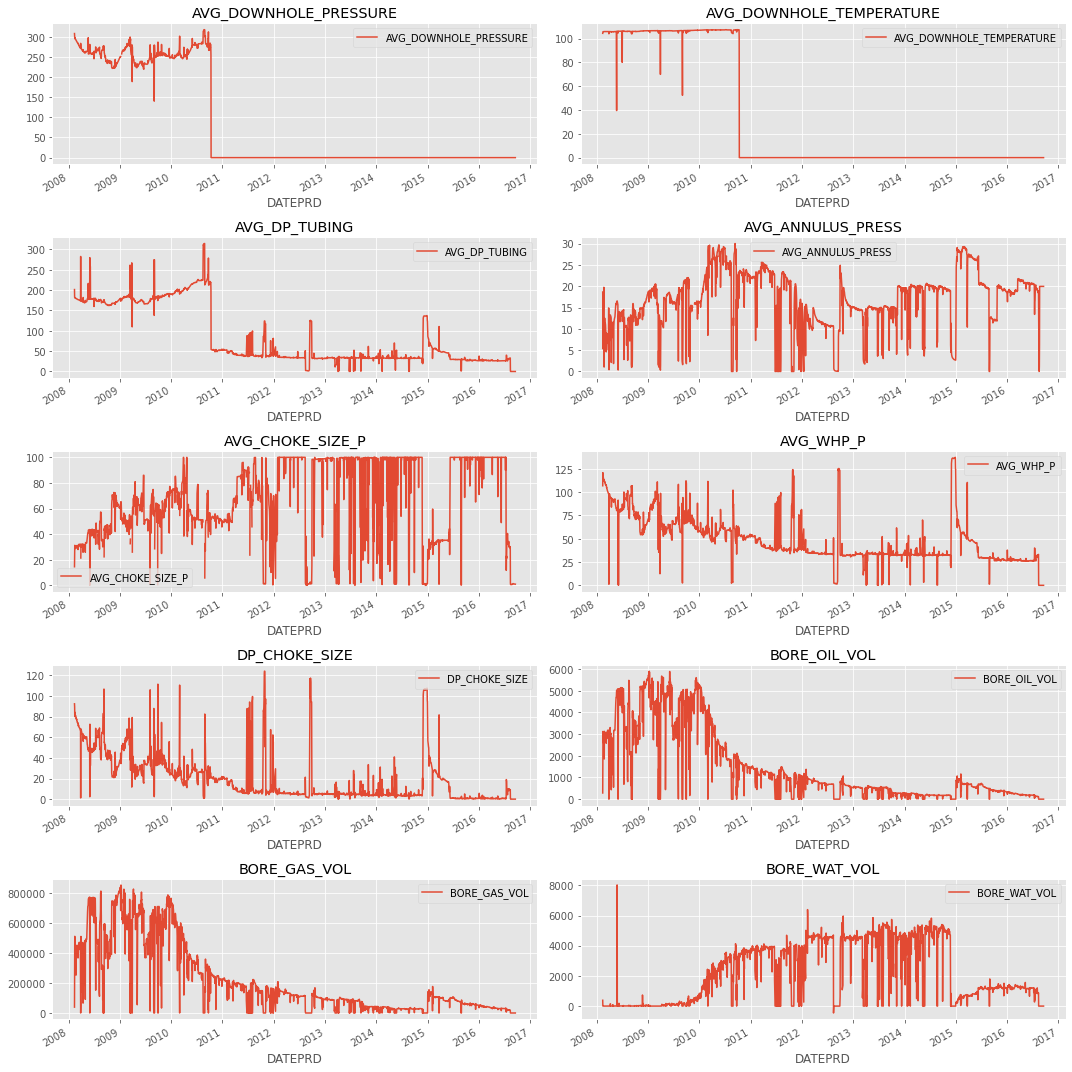

In [15]:
df31 = df3[['DATEPRD','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING',
            'AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','DP_CHOKE_SIZE',
            'BORE_OIL_VOL',"BORE_GAS_VOL","BORE_WAT_VOL"]]


f, axes = plt.subplots(5, 2, figsize=(15, 15))

df31.plot(x = "DATEPRD", y = "AVG_DOWNHOLE_PRESSURE", title = "AVG_DOWNHOLE_PRESSURE", fontsize = 10, ax=axes[0, 0]) 
df31.plot(x = "DATEPRD", y = "AVG_DOWNHOLE_TEMPERATURE", title = "AVG_DOWNHOLE_TEMPERATURE", fontsize = 10, ax=axes[0, 1])
df31.plot(x = "DATEPRD", y = "AVG_DP_TUBING", title = "AVG_DP_TUBING", fontsize = 10, ax=axes[1, 0]) 
df31.plot(x = "DATEPRD", y = "AVG_ANNULUS_PRESS", title = "AVG_ANNULUS_PRESS", fontsize = 10, ax=axes[1, 1]) 
df31.plot(x = "DATEPRD", y = "AVG_CHOKE_SIZE_P", title = "AVG_CHOKE_SIZE_P", fontsize = 10, ax=axes[2, 0]) 
df31.plot(x = "DATEPRD", y = "AVG_WHP_P", title = "AVG_WHP_P", fontsize = 10, ax=axes[2, 1]) 
df31.plot(x = "DATEPRD", y = "DP_CHOKE_SIZE", title = "DP_CHOKE_SIZE", fontsize = 10, ax=axes[3, 0])
df31.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "BORE_OIL_VOL", fontsize = 10, ax=axes[3, 1])
df31.plot(x = "DATEPRD", y = "BORE_GAS_VOL", title = "BORE_GAS_VOL", fontsize = 10, ax=axes[4, 0])
df31.plot(x = "DATEPRD", y = "BORE_WAT_VOL", title = "BORE_WAT_VOL", fontsize = 10, ax=axes[4, 1])

plt.tight_layout() 

In [16]:
df31.describe().transpose()

count           mean            std     min  \
AVG_DOWNHOLE_PRESSURE     3050.0      80.729072     120.086902    0.00   
AVG_DOWNHOLE_TEMPERATURE  3050.0      33.292076      49.354533    0.00   
AVG_DP_TUBING             3050.0      84.765924      72.511534    0.00   
AVG_ANNULUS_PRESS         3043.0      17.272199       6.396437    0.00   
AVG_CHOKE_SIZE_P          3012.0      69.254352      30.179952    0.00   
AVG_WHP_P                 3056.0      47.973013      24.305518    0.00   
DP_CHOKE_SIZE             3056.0      19.292670      22.750867    0.00   
BORE_OIL_VOL              3056.0    1498.563334    1662.851799    0.00   
BORE_GAS_VOL              3056.0  218436.609300  235250.885353    0.00   
BORE_WAT_VOL              3056.0    2236.034152    1952.408547 -457.84   

                                   25%            50%            75%  \
AVG_DOWNHOLE_PRESSURE         0.000000       0.000000     239.422752   
AVG_DOWNHOLE_TEMPERATURE      0.000000       0.000000     106.048231   
AVG_DP_TUBING                32.454825      38.721292     171.190061   
AVG_ANNULUS_PRESS            13.975764      18.660021      20.825525   
AVG_CHOKE_SIZE_P             48.894109      70.724595      99.998130   
AVG_WHP_P                    32.421836      38.445743      59.598066   
DP_CHOKE_SIZE                 3.966373       7.502564      27.428521   
BORE_OIL_VOL                266.222500     697.655000    2404.467500   
BORE_GAS_VOL              41004.987500  107734.345000  344820.467500   
BORE_WAT_VOL                156.872500    1349.840000    4397.452500   

                                    max  
AVG_DOWNHOLE_PRESSURE        317.701150  
AVG_DOWNHOLE_TEMPERATURE     107.507552  
AVG_DP_TUBING                314.409160  
AVG_ANNULUS_PRESS             30.019828  
AVG_CHOKE_SIZE_P             100.000000  
AVG_WHP_P                    137.311030  
DP_CHOKE_SIZE                124.122990  
BORE_OIL_VOL                5901.840000  
BORE_GAS_VOL              851131.520000  
BORE_WAT_VOL                8019.740000

In [17]:
f, axes = plt.subplots(5, 2, figsize=(15, 10))

df4.plot(x = "DATEPRD", y = "AVG_DOWNHOLE_PRESSURE", title = "AVG_DOWNHOLE_PRESSURE", fontsize = 10, ax=axes[0, 0]) 
df4.plot(x = "DATEPRD", y = "AVG_DOWNHOLE_TEMPERATURE", title = "AVG_DOWNHOLE_TEMPERATURE", fontsize = 10, ax=axes[0, 1])
df4.plot(x = "DATEPRD", y = "AVG_DP_TUBING", title = "AVG_DP_TUBING", fontsize = 10, ax=axes[1, 0]) 
df4.plot(x = "DATEPRD", y = "AVG_ANNULUS_PRESS", title = "AVG_ANNULUS_PRESS", fontsize = 10, ax=axes[1, 1]) 
df4.plot(x = "DATEPRD", y = "AVG_CHOKE_SIZE_P", title = "AVG_CHOKE_SIZE_P", fontsize = 10, ax=axes[2, 0]) 
df4.plot(x = "DATEPRD", y = "AVG_WHP_P", title = "AVG_WHP_P", fontsize = 10, ax=axes[2, 1]) 
df4.plot(x = "DATEPRD", y = "DP_CHOKE_SIZE", title = "DP_CHOKE_SIZE", fontsize = 10, ax=axes[3, 0])
df4.plot(x = "DATEPRD", y = "BORE_OIL_VOL", title = "BORE_OIL_VOL", fontsize = 10, ax=axes[3, 1])
df4.plot(x = "DATEPRD", y = "BORE_GAS_VOL", title = "BORE_GAS_VOL", fontsize = 10, ax=axes[4, 0])
df4.plot(x = "DATEPRD", y = "BORE_WAT_VOL", title = "BORE_WAT_VOL", fontsize = 10, ax=axes[4, 1])

plt.tight_layout() 

# 3 - Feature Engineering

In [18]:
df32 = df31[['DATEPRD','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','DP_CHOKE_SIZE',
            'BORE_OIL_VOL',"BORE_GAS_VOL","BORE_WAT_VOL"]]

df32.shape

(3056, 9)

In [19]:
df32 = df32[df32.BORE_WAT_VOL < 7000]             # remove really high abnormal value
df32 = df32[df32.BORE_WAT_VOL > 0]                # remove negative value

df32.shape

(2758, 9)

In [20]:
df32["days"] = (df32["DATEPRD"] - df32["DATEPRD"].min()).dt.days

In [21]:
df32.tail(25).transpose()


4906                 4907  \
DATEPRD            2016-07-19 00:00:00  2016-07-20 00:00:00   
AVG_DP_TUBING                26.999265            27.093946   
AVG_ANNULUS_PRESS            19.916144            19.995747   
AVG_CHOKE_SIZE_P             40.275303            40.299693   
AVG_WHP_P                    26.999265            27.093946   
DP_CHOKE_SIZE                 4.719148             4.816893   
BORE_OIL_VOL                    143.87               145.49   
BORE_GAS_VOL                  23020.36             23270.27   
BORE_WAT_VOL                   1112.91              1030.59   
days                              3080                 3081   

                                  4908                 4909  \
DATEPRD            2016-07-21 00:00:00  2016-07-22 00:00:00   
AVG_DP_TUBING                26.946254            27.750885   
AVG_ANNULUS_PRESS            20.128891            20.233757   
AVG_CHOKE_SIZE_P             40.011195            39.099103   
AVG_WHP_P                    26.946254            27.750885   
DP_CHOKE_SIZE                 4.664529             5.512783   
BORE_OIL_VOL                     142.5                134.8   
BORE_GAS_VOL                  22801.67             21569.02   
BORE_WAT_VOL                    976.58               968.17   
days                              3082                 3083   

                                  4910                 4911  \
DATEPRD            2016-07-23 00:00:00  2016-07-24 00:00:00   
AVG_DP_TUBING                26.352999            26.171818   
AVG_ANNULUS_PRESS             20.30631            20.236743   
AVG_CHOKE_SIZE_P             40.518707            40.032388   
AVG_WHP_P                    26.352999            26.171818   
DP_CHOKE_SIZE                  4.28725             4.387932   
BORE_OIL_VOL                     136.3               139.91   
BORE_GAS_VOL                  21807.05             22385.53   
BORE_WAT_VOL                    989.13               996.87   
days                              3084                 3085   

                                  4912                 4913  \
DATEPRD            2016-07-25 00:00:00  2016-07-26 00:00:00   
AVG_DP_TUBING                28.916749            31.294069   
AVG_ANNULUS_PRESS            19.811638            19.485724   
AVG_CHOKE_SIZE_P             34.575606            32.116006   
AVG_WHP_P                    28.916749            31.294069   
DP_CHOKE_SIZE                 7.174393              9.69247   
BORE_OIL_VOL                    133.66               129.53   
BORE_GAS_VOL                   21383.6             20719.18   
BORE_WAT_VOL                    878.39                837.4   
days                              3086                 3087   

                                  4914                 4915  ...  \
DATEPRD            2016-07-27 00:00:00  2016-07-28 00:00:00  ...   
AVG_DP_TUBING                31.447471            31.440457  ...   
AVG_ANNULUS_PRESS            19.467012            19.405902  ...   
AVG_CHOKE_SIZE_P             31.919506            31.939926  ...   
AVG_WHP_P                    31.447471            31.440457  ...   
DP_CHOKE_SIZE                 9.853029             9.775842  ...   
BORE_OIL_VOL                     126.9               128.63  ...   
BORE_GAS_VOL                  20303.61             20581.42  ...   
BORE_WAT_VOL                    905.64               941.79  ...   
days                              3088                 3089  ...   

                                  4921                 4922  \
DATEPRD            2016-08-03 00:00:00  2016-08-04 00:00:00   
AVG_DP_TUBING                32.499334            32.436724   
AVG_ANNULUS_PRESS            19.059713              19.0695   
AVG_CHOKE_SIZE_P             29.829244            30.332368   
AVG_WHP_P                    32.499334            32.436724   
DP_CHOKE_SIZE                10.182699             8.575715   
BORE_OIL_VOL                    123.16               118.81   
BORE_

In [22]:
df32.index

Int64Index([1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
            ...
            4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930],
           dtype='int64', length=2758)

In [23]:
# df.set_index('DATEPRD', inplace=True)

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(df32.corr(), annot=True, linecolor='white',linewidths=6, cmap= 'Accent')

<AxesSubplot:>

<AxesSubplot:>

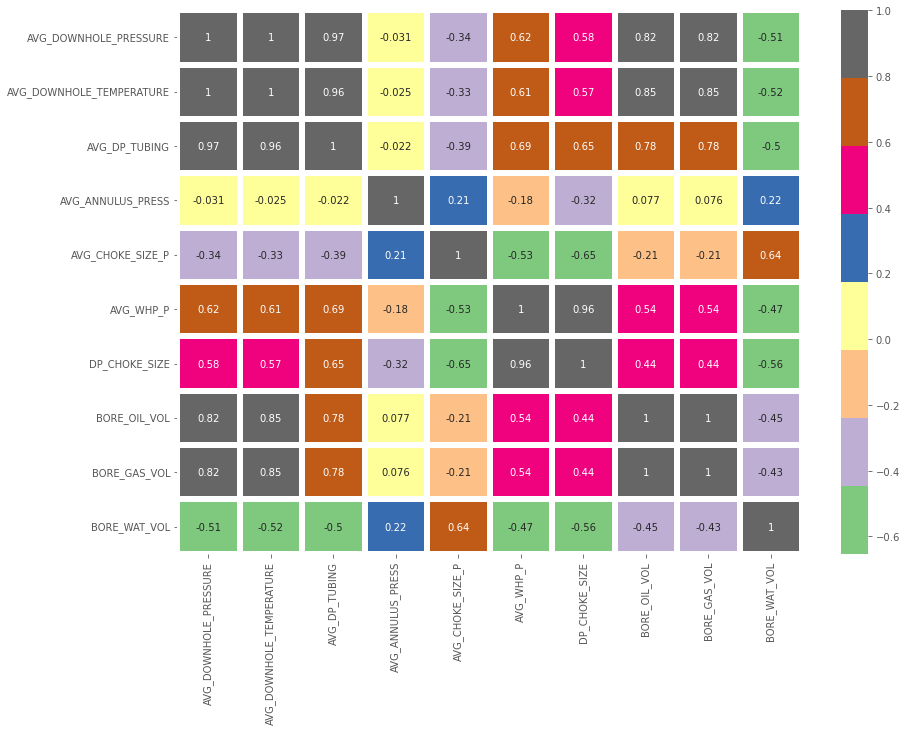

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(df31.corr(), annot=True, linecolor='white',linewidths=6, cmap= 'Accent')

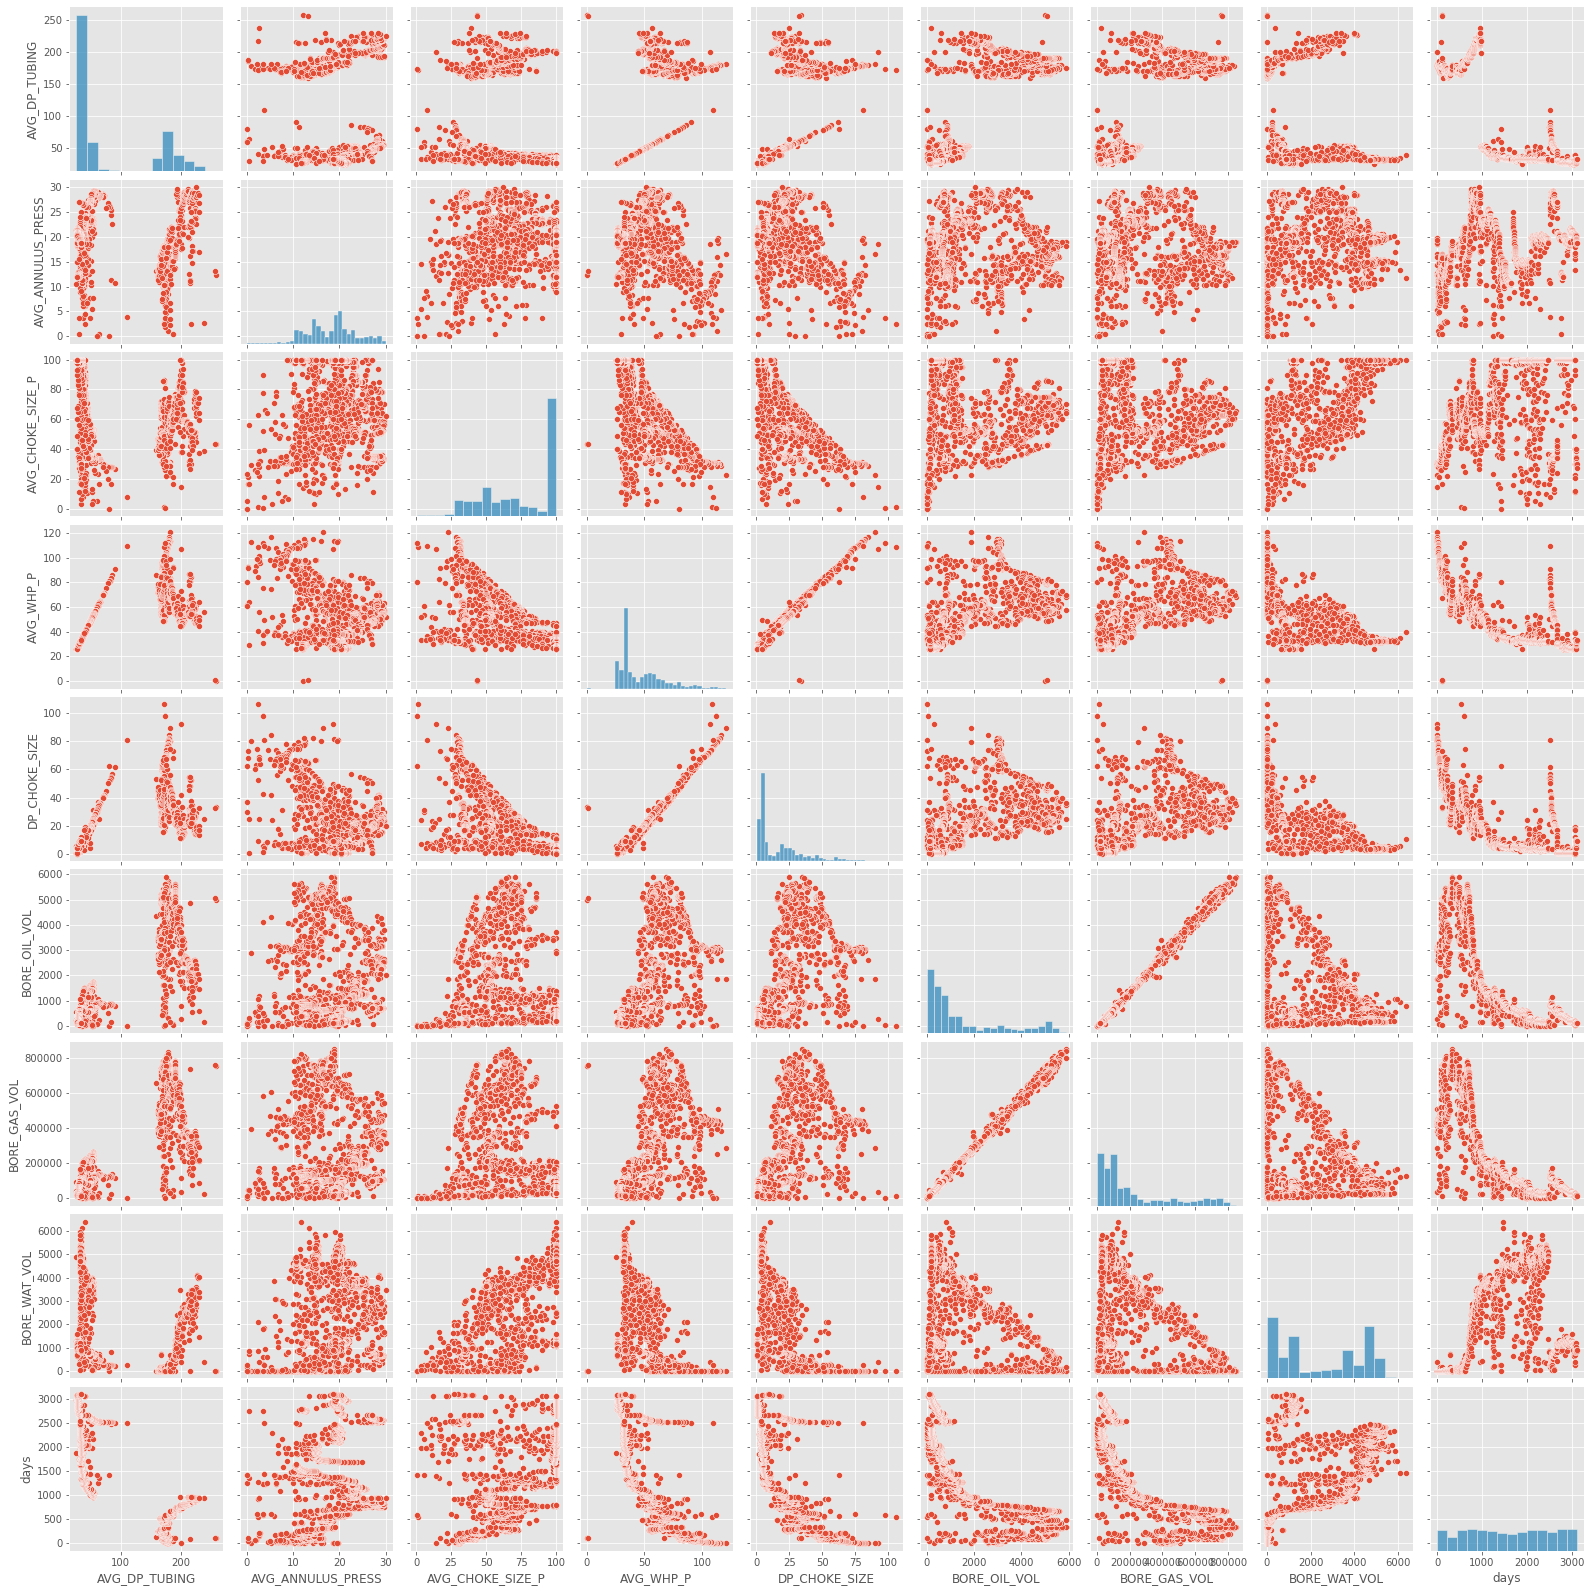

In [26]:
sns.pairplot(df32)

In [27]:
df32.isna().sum()

DATEPRD               0
AVG_DP_TUBING         6
AVG_ANNULUS_PRESS    13
AVG_CHOKE_SIZE_P      0
AVG_WHP_P             0
DP_CHOKE_SIZE         0
BORE_OIL_VOL          0
BORE_GAS_VOL          0
BORE_WAT_VOL          0
days                  0
dtype: int64

In [28]:
df32 = df32.dropna()

In [29]:
df32.isna().sum() , df32.shape

(DATEPRD              0
 AVG_DP_TUBING        0
 AVG_ANNULUS_PRESS    0
 AVG_CHOKE_SIZE_P     0
 AVG_WHP_P            0
 DP_CHOKE_SIZE        0
 BORE_OIL_VOL         0
 BORE_GAS_VOL         0
 BORE_WAT_VOL         0
 days                 0
 dtype: int64,
 (2739, 10))

In [30]:
df32.describe().transpose()

count           mean            std        min  \
AVG_DP_TUBING      2739.0      81.883718      70.184320  25.842671   
AVG_ANNULUS_PRESS  2739.0      18.285003       5.310481   0.000000   
AVG_CHOKE_SIZE_P   2739.0      74.062681      26.229328   0.327053   
AVG_WHP_P          2739.0      46.349114      19.258162   0.000000   
DP_CHOKE_SIZE      2739.0      16.313196      17.725539   0.255408   
BORE_OIL_VOL       2739.0    1517.795790    1608.212951   0.000000   
BORE_GAS_VOL       2739.0  221698.560705  226921.354858   7.090000   
BORE_WAT_VOL       2739.0    2487.330661    1896.562950   0.010000   
days               2739.0    1586.173056     907.982028   0.000000   

                            25%            50%            75%            max  
AVG_DP_TUBING         32.503335      38.008407     170.119604     259.087354  
AVG_ANNULUS_PRESS     14.707892      18.979787      21.430369      30.019828  
AVG_CHOKE_SIZE_P      51.188932      77.822992     100.000000     100.000000  
AVG_WHP_P             32.500195      37.993699      57.080236     120.888576  
DP_CHOKE_SIZE          4.016735       6.913740      24.825067     106.035140  
BORE_OIL_VOL         330.290000     719.660000    2344.660000    5888.690000  
BORE_GAS_VOL       51743.960000  113341.210000  335193.480000  835981.330000  
BORE_WAT_VOL         697.025000    2423.990000    4513.105000    6391.890000  
days                 810.500000    1584.000000    2373.500000    3104.000000

# 4 - ML Models 

## (i) Multi Linear Regression

In [31]:
#Scaling the Variables using MIN-MAX scaler
from sklearn import preprocessing

#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerX=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1

scalerX.fit(df32[['days','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P',
                  'DP_CHOKE_SIZE','BORE_GAS_VOL','BORE_WAT_VOL']])

scalerY=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerY.fit(df32[['BORE_OIL_VOL']])

dfX_scaled=scalerX.transform(df32[['days','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P',
                                   'AVG_WHP_P','DP_CHOKE_SIZE','BORE_GAS_VOL','BORE_WAT_VOL']])  #will return an array
dfY_scaled=scalerY.transform(df32[['BORE_OIL_VOL']])                                             #will return an array
dfX_scaled

array([[0.00000000e+00, 7.52031417e-01, 6.20908184e-01, ...,
        8.71808779e-01, 4.65105001e-02, 6.02326702e-02],
       [3.22164948e-04, 6.70121476e-01, 5.48525494e-01, ...,
        8.44819114e-01, 3.41205574e-01, 1.11391328e-03],
       [6.44329897e-04, 6.68933644e-01, 4.21707581e-01, ...,
        7.55012852e-01, 6.10004191e-01, 1.79915768e-04],
       ...,
       [9.99355670e-01, 2.96226929e-02, 6.22838329e-01, ...,
        8.14390258e-02, 2.30335088e-02, 1.33103250e-01],
       [9.99677835e-01, 2.99120225e-02, 6.26754116e-01, ...,
        8.18107515e-02, 2.28020423e-02, 1.33613272e-01],
       [1.00000000e+00, 3.13145118e-02, 6.23522182e-01, ...,
        8.51345347e-02, 1.98481475e-02, 1.37782624e-01]])

In [32]:
df_scaled=pd.DataFrame(dfX_scaled, columns=['days','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P',
                  'DP_CHOKE_SIZE','BORE_GAS_VOL','BORE_WAT_VOL'])
df_scaled['BORE_OIL_VOL']=dfY_scaled
df_scaled.transpose()

0         1         2         3         4         5     \
days               0.000000  0.000322  0.000644  0.000966  0.001289  0.001611   
AVG_DP_TUBING      0.752031  0.670121  0.668934  0.664493  0.663074  0.662408   
AVG_ANNULUS_PRESS  0.620908  0.548525  0.421708  0.175352  0.412548  0.479169   
AVG_CHOKE_SIZE_P   0.142038  0.225798  0.310244  0.282844  0.299990  0.297443   
AVG_WHP_P          0.883507  1.000000  0.940686  0.966432  0.954883  0.952992   
DP_CHOKE_SIZE      0.871809  0.844819  0.755013  0.794061  0.776175  0.774374   
BORE_GAS_VOL       0.046511  0.341206  0.610004  0.458650  0.500574  0.505704   
BORE_WAT_VOL       0.060233  0.001114  0.000180  0.000150  0.000763  0.000288   
BORE_OIL_VOL       0.048338  0.317507  0.530524  0.442930  0.518248  0.506501   

                       6         7         8         9     ...      2729  \
days               0.001933  0.002255  0.002577  0.002899  ...  0.997101   
AVG_DP_TUBING      0.664909  0.661183  0.659475  0.658498  ...  0.028539   
AVG_ANNULUS_PRESS  0.532330  0.626628  0.657591  0.647295  ...  0.634904   
AVG_CHOKE_SIZE_P   0.300797  0.302589  0.296770  0.302649  ...  0.295990   
AVG_WHP_P          0.937076  0.941107  0.938052  0.935625  ...  0.268837   
DP_CHOKE_SIZE      0.756361  0.765927  0.761190  0.753639  ...  0.093849   
BORE_GAS_VOL       0.495020  0.513426  0.529892  0.506956  ...  0.022352   
BORE_WAT_VOL       0.001012  0.000113  0.000070  0.000069  ...  0.188356   
BORE_OIL_VOL       0.506143  0.517295  0.519161  0.514602  ...  0.020915   

                       2730      2731      2732      2733      2734      2735  \
days               0.997423  0.997745  0.998067  0.998389  0.998711  0.999034   
AVG_DP_TUBING      0.028271  0.028203  0.028123  0.029034  0.028164  0.029774   
AVG_ANNULUS_PRESS  0.635230  0.628871  0.632242  0.626699  0.622641  0.615373   
AVG_CHOKE_SIZE_P   0.301038  0.300313  0.300519  0.300404  0.300222  0.291137   
AVG_WHP_P          0.268319  0.268189  0.268033  0.269792  0.268112  0.271220   
DP_CHOKE_SIZE      0.078657  0.078356  0.078379  0.080319  0.078110  0.082499   
BORE_GAS_VOL       0.025195  0.023351  0.022620  0.024253  0.022923  0.021596   
BORE_WAT_VOL       0.157403  0.143299  0.134624  0.135079  0.135128  0.127856   
BORE_OIL_VOL       0.020176  0.020679  0.020157  0.020371  0.020315  0.018783   

                       2736      2737      2738  
days               0.999356  0.999678  1.000000  
AVG_DP_TUBING      0.029623  0.029912  0.031315  
AVG_ANNULUS_PRESS  0.622838  0.626754  0.623522  
AVG_CHOKE_SIZE_P   0.300031  0.299878  0.270571  
AVG_WHP_P          0.270927  0.271485  0.274191  
DP_CHOKE_SIZE      0.081439  0.081811  0.085135  
BORE_GAS_VOL       0.023034  0.022802  0.019848  
BORE_WAT_VOL       0.133103  0.133613  0.137783  
BORE_OIL_VOL       0.020059  0.020448  0.017804  

[9 rows x 2739 columns]

In [33]:
X = df_scaled[['days','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P',
                  'DP_CHOKE_SIZE','BORE_GAS_VOL','BORE_WAT_VOL']]
y = df_scaled[['BORE_OIL_VOL']]

In [34]:
from sklearn.model_selection import train_test_split

seed= 1000
np.random.seed(seed)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# splitting the data to forecast 
train_size=  int(.7 * len(X))
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

X_train.describe()

days  AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  \
count  1917.000000    1917.000000        1917.000000       1917.000000   
mean      0.360090       0.327408           0.576063          0.706393   
std       0.208444       0.321048           0.182047          0.242249   
min       0.000000       0.000000           0.000000          0.000000   
25%       0.188466       0.034703           0.461960          0.510241   
50%       0.354704       0.102740           0.537050          0.689803   
75%       0.547358       0.649379           0.727870          0.990445   
max       0.716817       1.000000           1.000000          1.000000   

         AVG_WHP_P  DP_CHOKE_SIZE  BORE_GAS_VOL  BORE_WAT_VOL  
count  1917.000000    1917.000000   1917.000000   1917.000000  
mean      0.425493       0.190362      0.351470      0.414635  
std       0.163201       0.175568      0.282605      0.300747  
min       0.000000       0.015164      0.000000      0.000000  
25%       0.280673       0.047128      0.119759      0.028169  
50%       0.392505       0.141795      0.235460      0.537986  
75%       0.510450       0.269186      0.565363      0.706135  
max       1.000000       1.000000      1.000000      1.000000

In [35]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()                                            # linear model initialize

lm.fit(X_train,y_train)         #fit the lm model to the training rows
print("Linear Regression Intercept :", lm.intercept_)


Linear Regression Intercept : [-0.03882301]


Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

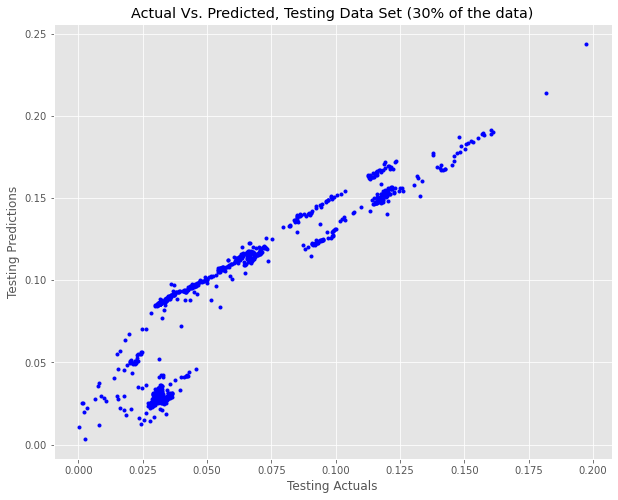

In [36]:
plt.figure(figsize=(10,8))
y_pred_train = lm.predict(X_train)
y_pred = lm.predict(X_test)
plt.plot(y_test,y_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [37]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

MAE: 0.03297
MSE: 0.0015
RMSE: 0.03871


In [38]:
y_prediction=lm.predict(X_train)
print('MAE:', round(metrics.mean_absolute_error(y_train, y_prediction),5))
print('MSE:', round(metrics.mean_squared_error(y_train, y_prediction),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, y_prediction)),5))

MAE: 0.00921
MSE: 0.00021
RMSE: 0.01434


<AxesSubplot:ylabel='Density'>

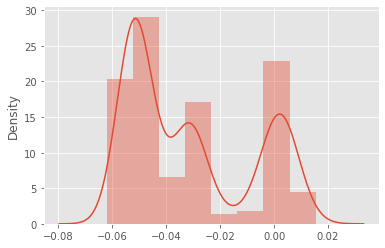

In [39]:
sns.distplot((y_test-y_pred))

In [40]:
import statsmodels.api as sm
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train,X).fit()
predictions = model.predict(X) 
 
model_stats = model.summary()
model_stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           BORE_OIL_VOL   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 9.482e+04
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:34:16   Log-Likelihood:                 5416.5
No. Observations:                1917   AIC:                        -1.082e+04
Df Residuals:                    1908   BIC:                        -1.077e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0388      0.006     -6.685      0.000      -0.050      -0.027
days                  0.0408      0.005      8.310      0.000       0.031       0.050
AVG_DP_TUBING         0.0248      0.002     11.001      0.000       0.020       0.029
AVG_ANNULUS_PRESS     0.0180      0.003      6.889      0.000       0.013       0.023
AVG_CHOKE_SIZE_P      0.0344      0.003     11.631      0.000       0.029       0.040
AVG_WHP_P             0.0824      0.016      5.228      0.000       0.051       0.113
DP_CHOKE_SIZE        -0.1043      0.014     -7.369      0.000      -0.132      -0.077
BORE_GAS_VOL          0.9692      0.003    311.626      0.000       0.963       0.975
BORE_WAT_VOL         -0.0771      0.003    -23.032      0.000      -0.084      -0.071
==============================================================================
Omnibus:                      340.437   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6101.133
Skew:                          -0.263   Prob(JB):                         0.00
Kurtosis:                      11.724   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


def test_plot(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    
    plt.style.use("dark_background")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

    # First subplot
    ax1.set_title("Model Test Plot", fontsize=35, pad=40)
    ax1.plot(X_test["days"], y_pred, color='white', label="oil_prediction")
    ax1.plot(X_test["days"], y_test, color='blue', label="True_oil")
    ax1.plot(X_train["days"], y_train, color='blue')
    ax1.axvline(x = 0.7, color = "#D35400", linewidth=3, label = 'Beginning of Prediction')
    ax1.set_xlabel('Days Normalized')
    ax1.set_ylabel('Oil Production Normalized')
    ax1.legend()

    # Second subplot (zoomed in)
    ax2.set_title("Zoomed In Plot", fontsize=35, pad=40)
    ax2.plot(X_test["days"], y_pred, color='white', label="oil_prediction")
    ax2.plot(X_test["days"], y_test, color='blue', label="True_oil")
    ax2.plot(X_train["days"], y_train, color='blue')
    ax2.set_xlabel('Days Normalized')
    ax2.set_ylabel('Oil Production Normalized')
    ax2.set_xlim([0.7, 1.01])           # set x limits
    ax2.set_ylim([0, 0.22])             # set y limits
    ax2.legend()

    plt.show()

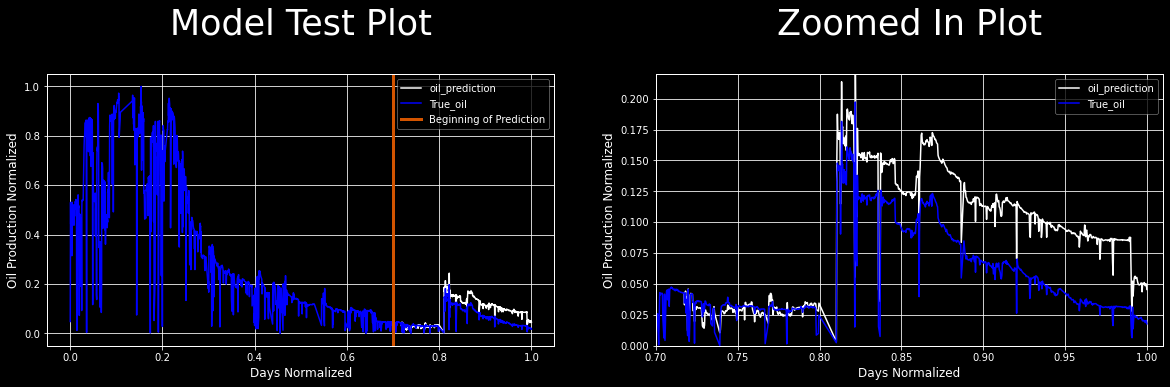

In [42]:
test_plot(lm)

###  Did not use Linear Regression because there are multiple independent variables 
> Did not use Logistic Regression because Oil Production is a continous variable

## (ii) KNN Regressor

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

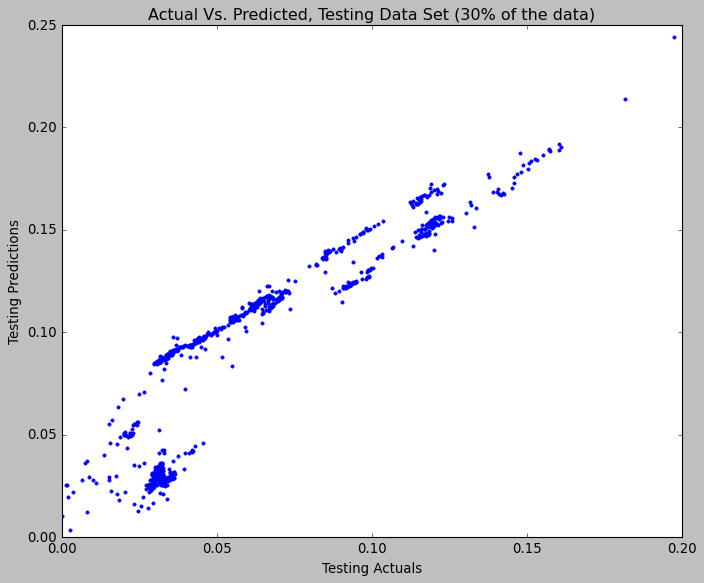

In [43]:
from sklearn.neighbors import KNeighborsRegressor  

kneighbor_regression = KNeighborsRegressor(n_neighbors=10)
kneighbor_regression.fit(X_train, y_train) 

y_prediction = kneighbor_regression.predict(X_train)

plt.style.use("classic")

plt.figure(figsize=(10,8))
y_pred = lm.predict(X_test)
plt.plot(y_test,y_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [44]:
kneighbor_regression.score(X_train, y_train)

0.9951691012260504

In [45]:
kneighbor_regression.score(X_test, y_test)

-0.7059358135901501

In [46]:
y_prediction=lm.predict(X_train)
print('MAE:', round(metrics.mean_absolute_error(y_train, y_prediction),5))
print('MSE:', round(metrics.mean_squared_error(y_train, y_prediction),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, y_prediction)),5))

MAE: 0.00921
MSE: 0.00021
RMSE: 0.01434


In [47]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

MAE: 0.03297
MSE: 0.0015
RMSE: 0.03871


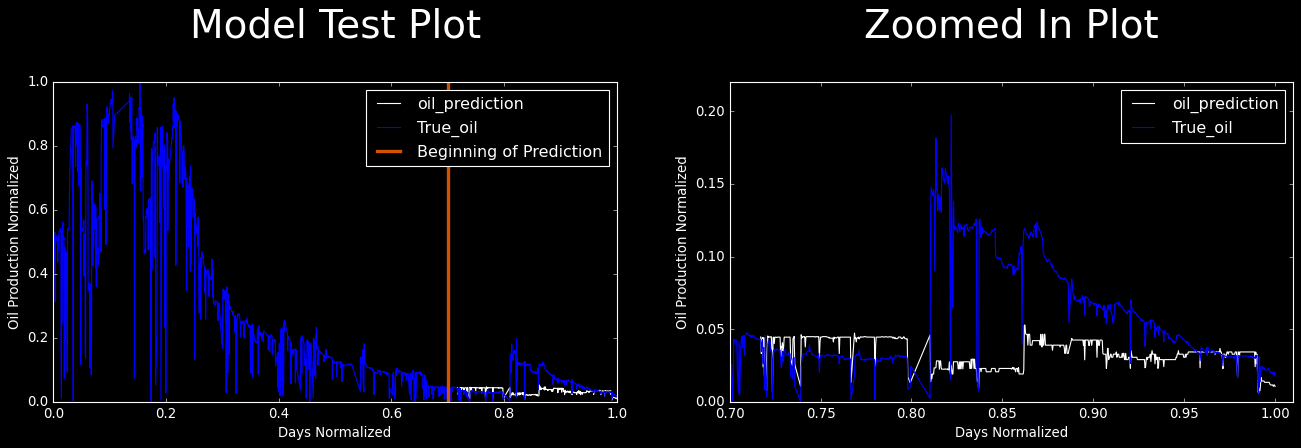

In [48]:
test_plot(kneighbor_regression)

## (iii) Decision Tree

In [49]:
from sklearn import tree                                  # tree program from scikit learn 
from sklearn.tree import _tree                            # for accessing tree information
                              
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score       # cross validation methods
from sklearn.tree import export_graphviz                  # graphical visualization of trees
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [50]:
parameters={
    'max_depth':np.arange(3,40),
    'min_samples_split':[3,4,5,6,10,15],
    'ccp_alpha':np.arange(0,0.2,10)
}

In [51]:
reg_3=GridSearchCV(tree.DecisionTreeRegressor(),
                   parameters,
                   cv=10,
                   n_jobs=-1)

In [52]:
reg_3.fit(X=X_train, y=y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.]),
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                         'min_samples_split': [3, 4, 5, 6, 10, 15]})

In [53]:
#extract best CV model and print its accuracy measure
cv_best_model=reg_3.best_estimator_
print("Best CV Accuracy: {}, with parameters: {}".format(reg_3.best_score_,reg_3.best_params_))

Best CV Accuracy: 0.9141678527768242, with parameters: {'ccp_alpha': 0.0, 'max_depth': 11, 'min_samples_split': 15}


In [54]:
y_tree = cv_best_model.predict(X_test)

In [55]:
plt.style.use("classic")

plt.figure(figsize=(10,8))

plt.plot(y_test,y_tree, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt


def evaluate_test (model, test_features, test_labels):
    predictions=model.predict(test_features)
    r2=r2_score(y_pred=predictions, y_true=test_labels)
    MAE=mean_absolute_error(test_labels, predictions)
    MSE=mean_squared_error(test_labels, predictions)
    rmse = sqrt(MSE)
    
    print('r2 = {:0.6f}'.format(r2))
    print('MAE = {:0.6f}'.format(MAE))
    print('Mean Square Error = {:0.6f}'.format(MSE))
    print('Squareroot Mean Square Error = {:0.6f}'.format(rmse))
    
def evaluate_train (model, train_features, train_labels):
    predictions=model.predict(train_features)
    r2=r2_score(y_pred=predictions, y_true=train_labels)
    MAE=mean_absolute_error(train_labels, predictions)
    MSE=mean_squared_error(train_labels, predictions)
    rmse = sqrt(MSE)
    
    print('r2 = {:0.6f}'.format(r2))
    print('MAE = {:0.6f}'.format(MAE))
    print('Mean Square Error = {:0.6f}'.format(MSE))
    print('Squareroot Mean Square Error = {:0.6f}'.format(rmse))
    

    

In [57]:
evaluate_test(cv_best_model,X_test,y_test)

r2 = 0.891649
MAE = 0.006720
Mean Square Error = 0.000147
Squareroot Mean Square Error = 0.012139


In [58]:
evaluate_train(cv_best_model,X_train,y_train)

r2 = 0.999527
MAE = 0.003190
Mean Square Error = 0.000039
Squareroot Mean Square Error = 0.006227


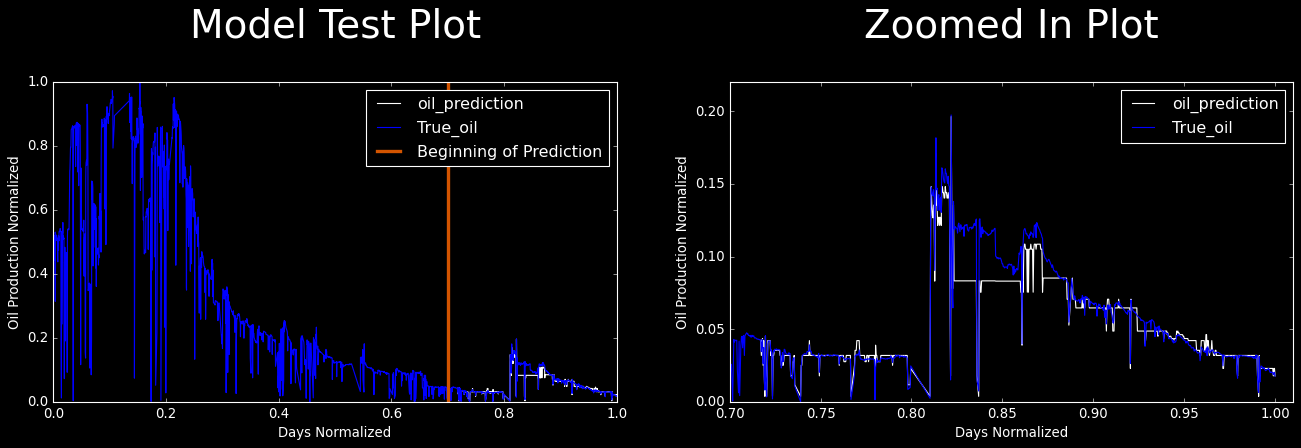

In [59]:
test_plot(reg_3)

## (iv) Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(seed)
rf = RandomForestRegressor(n_estimators=2500, criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=2,
    max_features='auto', bootstrap=True, n_jobs=-1) 

In [61]:
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=4,
                      n_estimators=2500, n_jobs=-1)

In [62]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

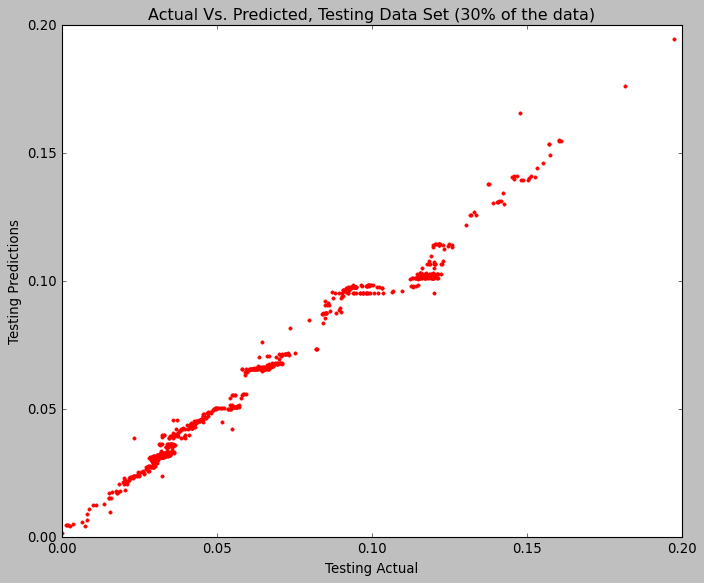

In [63]:
plt.style.use("classic")

plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'r.')
plt.xlabel('Testing Actual')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [64]:
evaluate_train(cv_best_model,X_train,y_train)

r2 = 0.999527
MAE = 0.003190
Mean Square Error = 0.000039
Squareroot Mean Square Error = 0.006227


In [65]:
evaluate_test(rf,X_test,y_test)                                 # Increasing n estimators decreases error on 6th decimal

r2 = 0.974505
MAE = 0.003613
Mean Square Error = 0.000035
Squareroot Mean Square Error = 0.005888


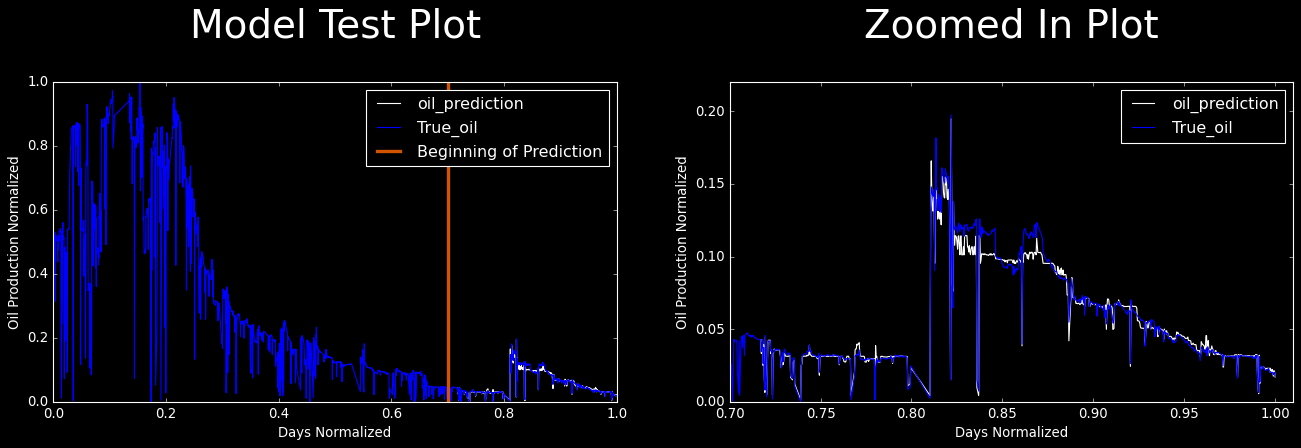

In [66]:
test_plot(rf)

## (v) Gradient Boosting

In [67]:
#from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor #as gbr 

In [68]:
num_trees = np.linspace(1,100,100)
max_features = 1
boosting_models1 = []; boosting_models2 = []; boosting_models3 = []; boosting_models4 = []
score1 = []; score2 = []; score3 = []; score4 = [] 

params1 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params2 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.3,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params3 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.7,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

params4 = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.80,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees in our random forest
    boosting_models1.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params1))
    boosting_models1[index-1].fit(X = X_train, y = y_train)
    score1.append(boosting_models1[index-1].score(X = X_test, y = y_test))
    
    boosting_models2.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params2))
    boosting_models2[index-1].fit(X = X_train, y = y_train)
    score2.append(boosting_models2[index-1].score(X = X_test, y = y_test)) 
    
    boosting_models3.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params3))
    boosting_models3[index-1].fit(X = X_train, y = y_train)
    score3.append(boosting_models3[index-1].score(X = X_test, y = y_test)) 
    
    boosting_models4.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params4))
    boosting_models4[index-1].fit(X = X_train, y = y_train)
    score4.append(boosting_models4[index-1].score(X = X_test, y = y_test)) 

    print(str(index)+ ', ', end =" ")
    index = index + 1
 
plt.style.use("classic")

plt.subplot(111) # plot jackknife results for all cases                                        
plt.scatter(num_trees,score1,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 0.1,")
plt.scatter(num_trees,score2,s=None, c='blue', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 0.3")
plt.scatter(num_trees,score3,s=None, c='black', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 0.7")
plt.scatter(num_trees,score4,s=None, c='green', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.3, edgecolors="black", label = "Learning Rate = 0.80")

plt.title('Variance Explained vs. Number of Trees',c='black'); plt.xlabel('Number of Trees',c='black'); plt.ylabel('Cross Validation Variance Explained',c='black')
plt.xlim(0,100); plt.ylim(0,1.0); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()

Complete of 100:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,  100,  

In [69]:
gbr = GradientBoostingRegressor(n_estimators = 200,loss ='ls', max_depth = 2,learning_rate = 0.3,
                                criterion = 'mse')


In [70]:
gbr.fit(X = X_train, y = y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.3, max_depth=2,
                          n_estimators=200)

In [71]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

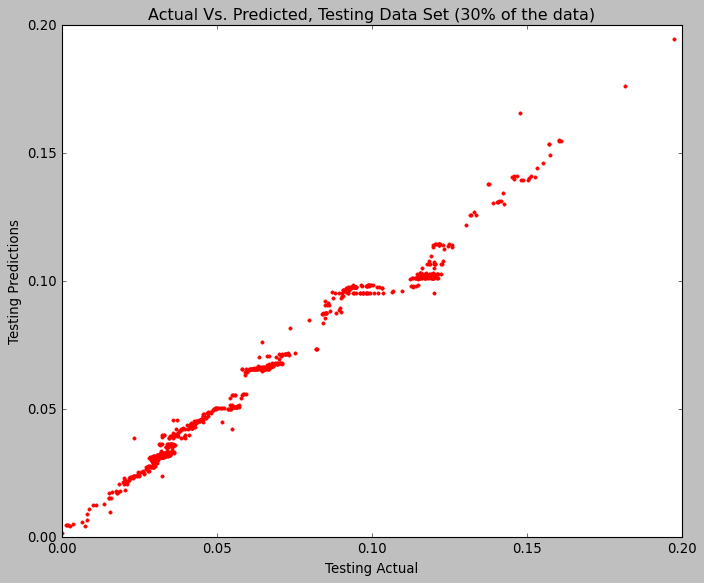

In [72]:
plt.style.use("classic")

plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'r.')
plt.xlabel('Testing Actual',c='black')
plt.ylabel('Testing Predictions',c='black')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)',c='black')

In [73]:
evaluate_test(gbr,X_test,y_test) 

r2 = 0.963240
MAE = 0.005518
Mean Square Error = 0.000050
Squareroot Mean Square Error = 0.007070


In [74]:
evaluate_train(gbr,X_train,y_train)

r2 = 0.999601
MAE = 0.003909
Mean Square Error = 0.000033
Squareroot Mean Square Error = 0.005723


In [75]:
test_plot(gbr)

## (vi) Extreme gradient boosting

In [76]:
from xgboost import XGBRegressor

xgb=XGBRegressor(objective ='reg:squarederror',n_estimators=200, reg_lambda=1, gamma=0,max_depth=3,
                 learning_rate = 0.1, reg_alpha = 0.1)

In [77]:
xgb.fit(X = X_train, y = y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

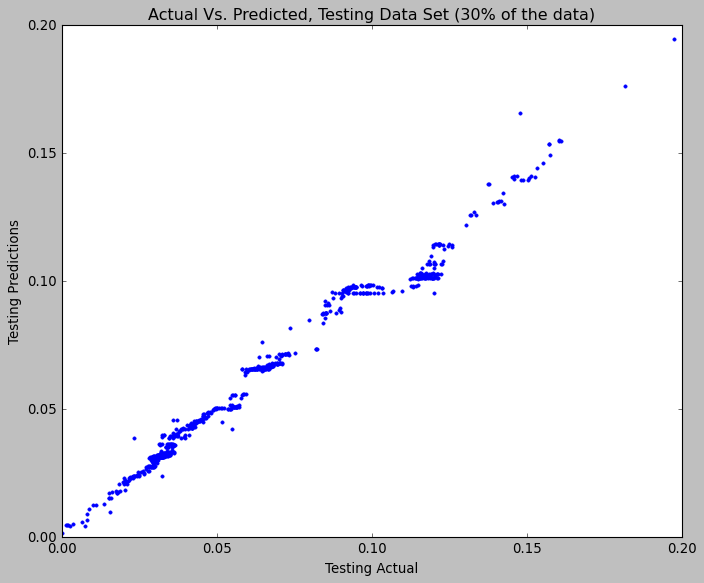

In [79]:
plt.style.use("classic")

plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'b.')
plt.xlabel('Testing Actual',c='black')
plt.ylabel('Testing Predictions',c='black')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)',c='black')



In [80]:
evaluate_test(xgb,X_test,y_test) 

r2 = 0.975236
MAE = 0.004361
Mean Square Error = 0.000034
Squareroot Mean Square Error = 0.005803


In [81]:
evaluate_train(xgb,X_train,y_train)

r2 = 0.999506
MAE = 0.003612
Mean Square Error = 0.000041
Squareroot Mean Square Error = 0.006365


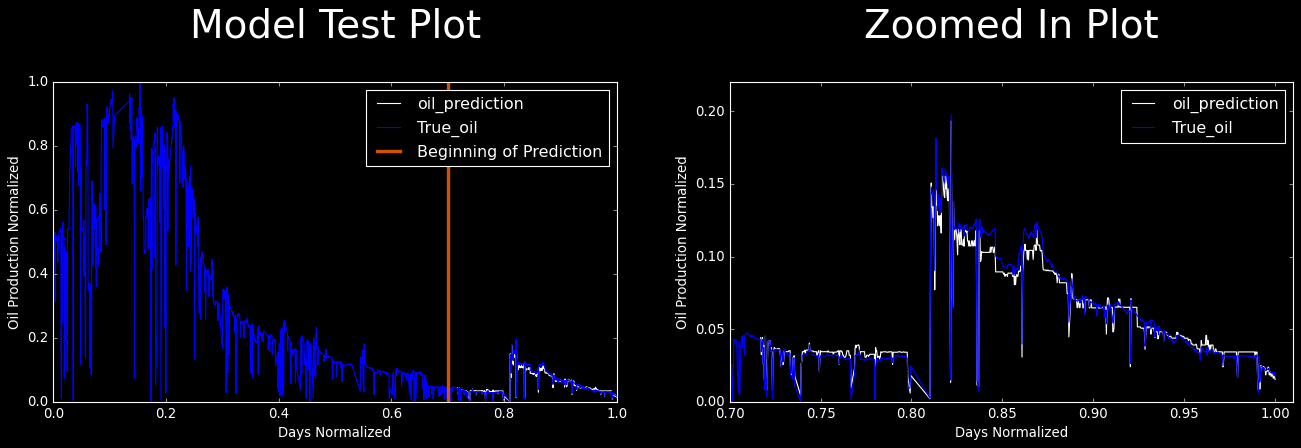

In [82]:
test_plot(xgb)

## (vii) Support Vector Machine

In [83]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [84]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [85]:

plt.style.use("classic")
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'g.')
plt.xlabel('Testing Actual',c='black')
plt.ylabel('Testing Predictions',c='black')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)',c='black')



Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [86]:
evaluate_test(svr,X_test,y_test) 

r2 = -6.937788
MAE = 0.099623
Mean Square Error = 0.010795
Squareroot Mean Square Error = 0.103899


In [87]:
test_plot(svr)

In [88]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [89]:
svr = SVR(kernel = 'sigmoid')
svr.fit(X_train, y_train)

SVR(kernel='sigmoid')

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

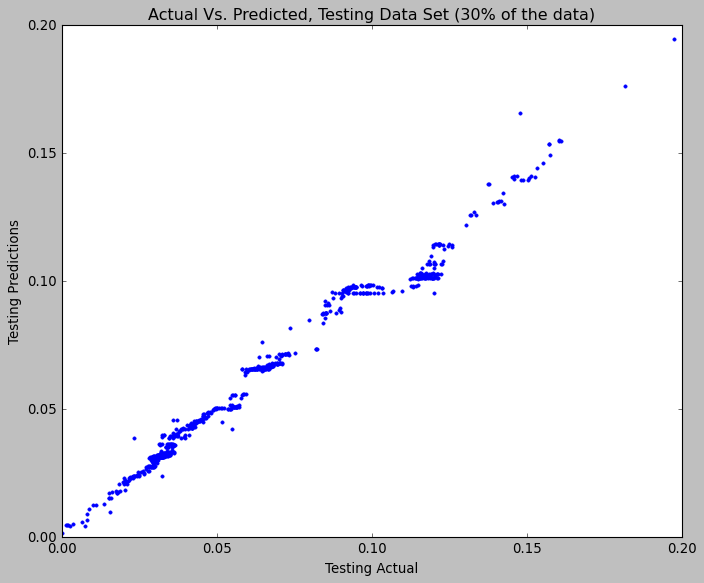

In [90]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

plt.style.use("classic")
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'b.')
plt.xlabel('Testing Actual',c='black')
plt.ylabel('Testing Predictions',c='black')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)',c='black')



In [91]:
evaluate_test(svr,X_test,y_test) 

r2 = -30885.366810
MAE = 6.105891
Mean Square Error = 42.003613
Squareroot Mean Square Error = 6.481019


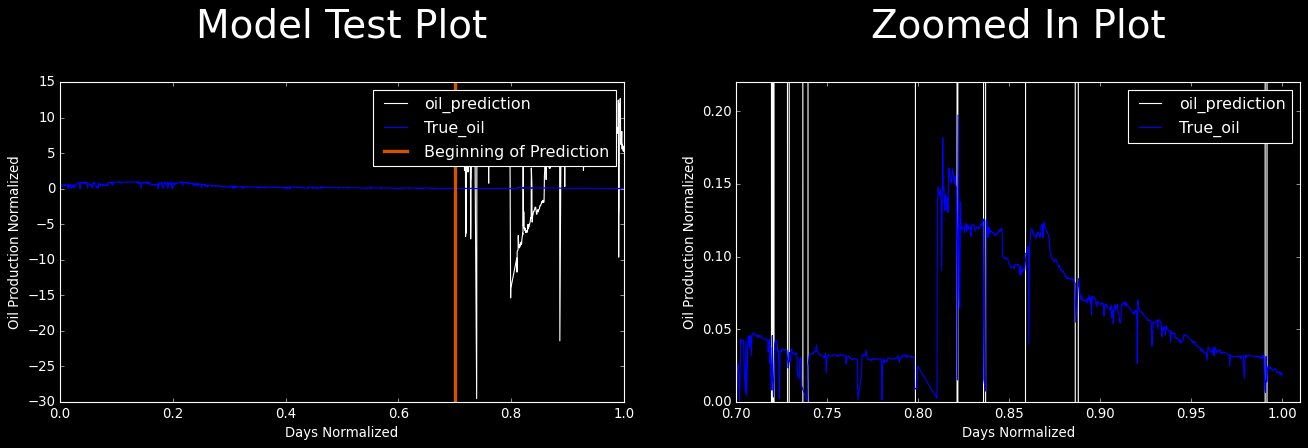

In [92]:
test_plot(svr)                                # Sigmoid is the worst performing

In [93]:
svr = SVR(kernel = 'poly', degree=3)
svr.fit(X_train, y_train)

SVR(kernel='poly')

Text(0.5, 1.0, 'Actual Vs. Predicted,30 % Testing Data Set (kernel = Poly)')

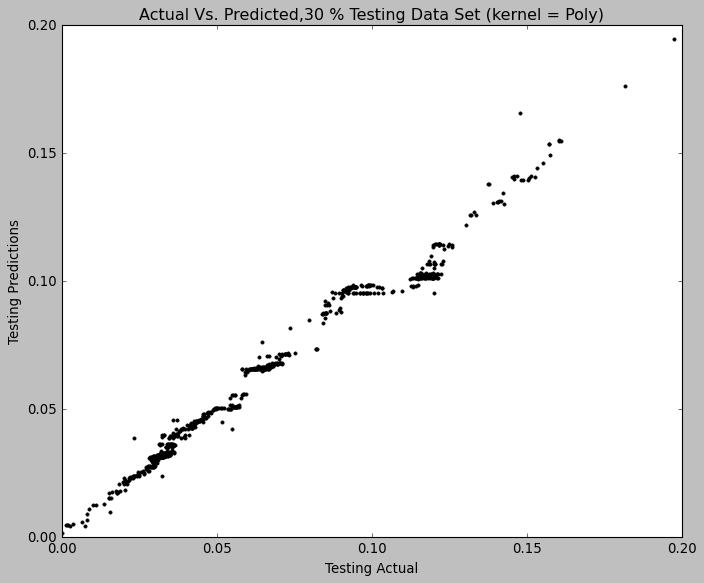

In [94]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)


plt.style.use("classic")
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'b.',c='black')
plt.xlabel('Testing Actual',c='black')
plt.ylabel('Testing Predictions',c='black')
plt.title('Actual Vs. Predicted,30 % Testing Data Set (kernel = Poly)',c='black')



In [95]:
evaluate_test(svr,X_test,y_test) 

r2 = -3.118292
MAE = 0.071445
Mean Square Error = 0.005601
Squareroot Mean Square Error = 0.074837


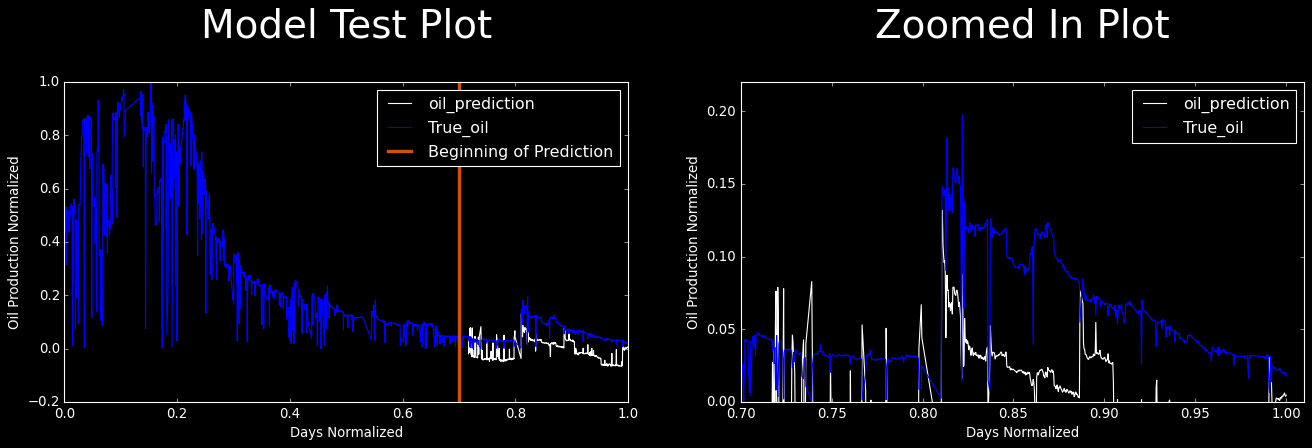

In [96]:
test_plot(svr)

###### ARIMA Forecasting { !ML }

In [97]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(oil):
    result=adfuller(oil)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [98]:
adfuller_test(df32['BORE_OIL_VOL'])

ADF Test Statistic : -1.5185931852817494
p-value : 0.5242943276736258
#Lags Used : 27
Number of Observations Used : 2711
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [99]:
df32['Bore_oil_first_diff'] = df32['BORE_OIL_VOL'].shift(30)

In [100]:
df32['Bore_oil_seasonal'] = df32['BORE_OIL_VOL']-df32['Bore_oil_first_diff']

In [101]:
adfuller_test(df32['Bore_oil_seasonal'].dropna())

ADF Test Statistic : -10.869923603782317
p-value : 1.3767744080471832e-19
#Lags Used : 28
Number of Observations Used : 2680
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [102]:
df32 = df32.dropna()

from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(df32['Bore_oil_seasonal'],order=(1,1,1))
model_fit=arima.fit()
results = model_fit

In [103]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Bore_oil_seasonal   No. Observations:                 2708
Model:                  ARIMA(1, 1, 1)   Log Likelihood              -20800.960
Method:                        css-mle   S.D. of innovations            524.396
Date:                 Thu, 27 Apr 2023   AIC                          41609.919
Time:                         18:35:17   BIC                          41633.535
Sample:                              1   HQIC                         41618.458
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.3021      2.452     -0.123      0.902      -5.107       4.503
ar.L1.D.Bore_oil_seasonal     0.4763      0.030     15.689      0.000       0.417       0.536
ma.L1.D.Bore_oil_seasonal    -0.8729      0.019    -45.669      0.000      -0.910      -0.835
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0995           +0.0000j            2.0995            0.0000
MA.1            1.1456           +0.0000j            1.1456            0.0000
-----------------------------------------------------------------------------
"""

In [104]:
# Need to work on MLP, CNN  & RNN -LSTM

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

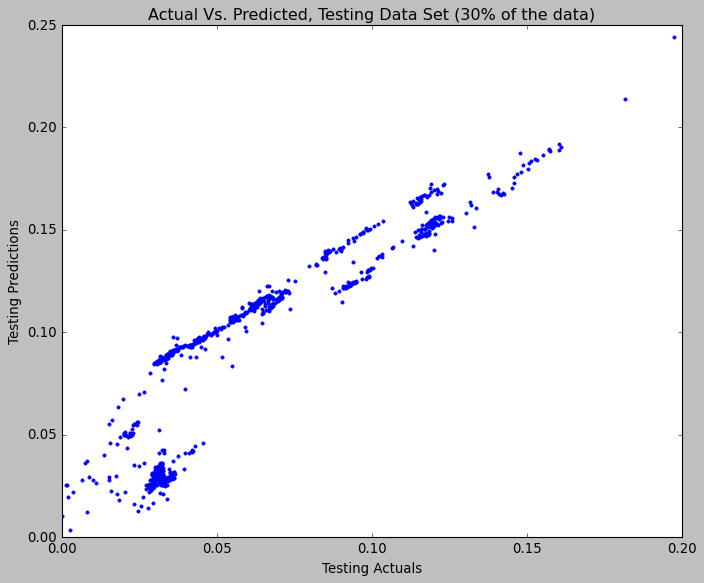

In [105]:
from sklearn.neighbors import KNeighborsRegressor  

kneighbor_regression = KNeighborsRegressor(n_neighbors=100)
kneighbor_regression.fit(X_train, y_train) 

y_prediction = kneighbor_regression.predict(X_train)

plt.style.use("classic")

plt.figure(figsize=(10,8))
y_pred = lm.predict(X_test)
plt.plot(y_test,y_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [106]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

MAE: 0.03297
MSE: 0.0015
RMSE: 0.03871
